In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from sklearn import datasets
from matplotlib.colors import ListedColormap

# Используемые функции

1) Функция реализации сигмоиды

$$\sigma(z) = \frac{1}{1 + exp(-z)}.$$

In [2]:
def sigmoid(x, w=1):
    return 1 / (1 + np.exp(-w*x))

2) Функция реализации вычисления потерь

$$-\text{ln}L(X) = -\sum^{l}_{i=1} (y_{i} \text{ln}{\sigma( -\left \langle w,x_{i} \right \rangle)}  + (1 - y_{i})\text{ln}({1 - \sigma( -\left \langle w,x_{i} \right \rangle)}).$$

In [3]:
def log_loss(w, X, y):

    A = sigmoid(np.dot(w.T, X))
    
    loss = -1.0 / X.shape[1] * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    loss = np.squeeze(loss)
    grad = 1.0 / X.shape[1] * np.dot(X, (A - y).T)
    
    return loss, grad

3) Градиентный спуск
$$w_{n+1} = w_{n} - \eta \frac{1}{l}X(\sigma(-wx)-Y)^{T},$$

In [4]:
def optimize(w, X, y, n_iterations, eta):
    losses = []
    
    for i in range(n_iterations):        
        loss, grad = log_loss(w, X, y)
        w = w - eta * grad

        losses.append(loss)
        
    return w, losses

4) Предсказание

In [11]:
def predict(w, X, p = 0.5):
    
    m = X.shape[1]
    
    y_predicted = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T, X))
    
    for i in range(A.shape[1]):
        if (A[:,i] > p): 
            y_predicted[:, i] = 1
        elif (A[:,i] <= p):
            y_predicted[:, i] = 0
    
    return y_predicted

# Создание и подготовка данных

    1) Создаём данные.
    2) Перемешивваем данные, чтобы не было случайных закономерностей.
    3) Разделяем данные на тренировочную и тестовую выборки.

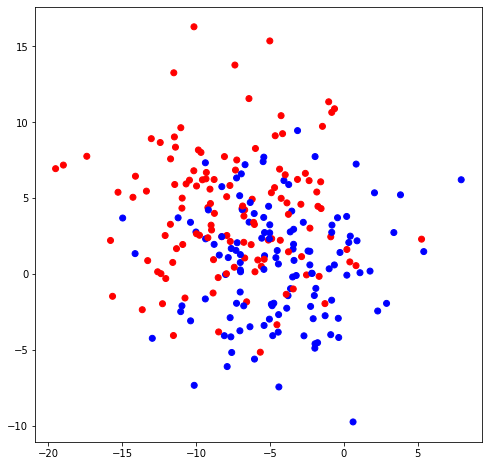

In [12]:
#data= datasets.make_classification(n_samples=250, n_features=2, n_informative=2, n_redundant=0, n_classes=2, random_state=32)
data = datasets.make_blobs(n_samples = 250, centers = 2, cluster_std = 4, random_state=12)

colors = ListedColormap(['red', 'blue'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in data[0]], [x[1] for x in data[0]], c=data[1], cmap=colors)

In [13]:
data

(array([[-7.30357934e+00,  1.55601845e+00],
        [-6.37386301e-01,  1.08876480e+01],
        [-7.26654882e+00, -1.92864575e+00],
        [-2.42985463e+00,  1.51629567e+00],
        [-8.95531924e+00,  2.90102095e+00],
        [-2.30081093e+00,  3.02152972e+00],
        [-1.54731767e+00,  4.31239478e+00],
        [-4.90910686e+00, -1.99063451e+00],
        [-6.35678216e+00, -3.47496818e+00],
        [-8.50826208e+00, -2.35900132e-01],
        [-1.09589572e+01, -2.09847314e+00],
        [ 2.06615911e+00,  5.35038311e+00],
        [-8.31651341e-01, -1.72423258e+00],
        [-1.27363167e+00, -2.74683191e+00],
        [-4.06050729e+00,  6.15690738e+00],
        [-8.76232290e+00,  3.99554485e+00],
        [-4.81739451e+00, -4.06064636e+00],
        [-9.06266821e+00,  5.59267600e+00],
        [ 1.83480650e-01,  3.79298835e+00],
        [-1.17393256e+01,  3.27481456e+00],
        [-6.71465185e+00,  4.22764427e+00],
        [-7.26398295e+00,  6.32928441e+00],
        [-4.40185104e+00, -7.440

In [16]:
np.random.seed(12)
shuffle_index = np.random.permutation(data[0].shape[0])
X, y = data[0][shuffle_index], data[1][shuffle_index]

In [17]:
train_proportion = 0.7
train_board = int(len(data[0]) * train_proportion)

X_train, X_test, y_train, y_test = X[:train_board], X[train_board:], y[:train_board], y[train_board:]
    
print("Размер обучающей выборки", X_train.shape)
print("Размер тестовой выборки", X_test.shape)
print("Размер списка меток для обучающей выборки", y_train.shape)
print("Размер списка меток для тестовой выборки", y_test.shape)

Размер обучающей выборки (175, 2)
Размер тестовой выборки (75, 2)
Размер списка меток для обучающей выборки (175,)
Размер списка меток для тестовой выборки (75,)


In [18]:
X_train_tr = X_train.transpose()
y_train_tr = y_train.reshape(1, y_train.shape[0])
X_test_tr = X_test.transpose()
y_test_tr = y_test.reshape(1, y_test.shape[0])

In [19]:
print("Размер обучающей выборки", X_train_tr.shape)
print("Размер тестовой выборки", X_test_tr.shape)
print("Размер списка меток для обучающей выборки", y_train_tr.shape)
print("Размер списка меток для тестовой выборки", y_test_tr.shape)

Размер обучающей выборки (2, 175)
Размер тестовой выборки (2, 75)
Размер списка меток для обучающей выборки (1, 175)
Размер списка меток для тестовой выборки (1, 75)


# Обучение

In [22]:
# иницилизируем начальный вектор весов
w0 = np.zeros((X_train_tr.shape[0], 1))

n_iterations = 250
eta = 1


w, losses = optimize(w0, X_train_tr, y_train_tr, n_iterations, eta)
#y = w1*x + w0

y_predicted_test = predict(w, X_test_tr, .4)
y_predicted_train = predict(w, X_train_tr, .6)

# В качестве меры точности возьмем долю правильных ответов
train_accuracy = 100.0 - np.mean(np.abs(y_predicted_train - y_train_tr)*100.0)
test_accuracy = 100.0 - np.mean(np.abs(y_predicted_test-y_test_tr)*100.0)

print(f"Итоговый вектор весов w: {w}")
print(f"Точность на обучающей выборке: {train_accuracy:.3f}")
print(f"Точность на тестовой выборке: {test_accuracy:.3f}")

Итоговый вектор весов w: [[-0.67096586]
 [-0.50646437]]
Точность на обучающей выборке: 56.000
Точность на тестовой выборке: 41.333


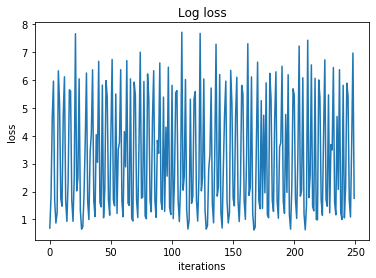

In [23]:
plt.title('Log loss')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.plot(range(len(losses)), losses)

# Домашнее задание

Визуализировать разделяющую плоскость по итогам обучению модели регрессии. 